# Louisville Crime Data

## Import Packages

In [385]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read and create a dataframe

In [386]:

df_2024 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2024.csv')

## Understanding and cleaning the data

From the review below the data appears to be clean and ready for basic EDA with 0 duplicate values and no columns that need removal or combination. The total rows are +70K across 16 columns. Some considerations and notes for enhancement in the future are below:

The data types are mostly objects. I believe I need to change some columns to integers such as zip_code or badge_id to be workable, but then again these aren't performance numbers for mathmatecial calculation.

I could separate the date_reported / date_occurred into new columns where the month and year are separated out so that it's easier to build charts and tables for those dimensions.

I also need to combine all downladed data into one file so that I can see more valuable trends over time. 

In [387]:
df_2024.head()

,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId
0,LMPD25144947,12/5/2025 5:28:00 PM,11/16/2024 5:00:00 AM,8701.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,4TH DIVISION,424,RESIDENCE/HOME,500 BLOCK LONGFIELD AVE,LOUISVILLE,40215,1
1,LMPD25140113,11/24/2025 4:22:00 AM,7/9/2024 4:00:00 AM,8631.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,8TH DIVISION,824,RESIDENCE/HOME,100 BLOCK LA FONTENAY DR,DOUGLASS HILLS,40223,2
2,LMPD25139843,11/23/2025 2:37:00 PM,11/15/2024 9:00:00 PM,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,YES,2ND DIVISION,223,HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK,1300 BLOCK S 26TH ST,LOUISVILLE,40210,3
3,LMPD25138669,11/20/2025 8:54:00 PM,1/1/2024 5:01:00 AM,8646.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,1ST DIVISION,111,RESIDENCE/HOME,2400 BLOCK NORTHWESTERN PKWY,LOUISVILLE,40212,4
4,LMPD25138625,11/20/2025 7:29:00 PM,10/29/2024 4:00:00 PM,8544.0,23 THEFT OTHER,"THEFT BY DECEPTION INCLUDING COLD CHECKS $1,00...",23H,A,YES,3RD DIVISION,323,RESIDENCE/HOME,200 BLOCK ANGELETTA WAY,LOUISVILLE,40214,5


In [388]:
df_2024.info

<bound method DataFrame.info of       incident_number           date_reported          date_occurred  \
0        LMPD25144947    12/5/2025 5:28:00 PM  11/16/2024 5:00:00 AM   
1        LMPD25140113   11/24/2025 4:22:00 AM    7/9/2024 4:00:00 AM   
2        LMPD25139843   11/23/2025 2:37:00 PM  11/15/2024 9:00:00 PM   
3        LMPD25138669   11/20/2025 8:54:00 PM    1/1/2024 5:01:00 AM   
4        LMPD25138625   11/20/2025 7:29:00 PM  10/29/2024 4:00:00 PM   
...               ...                     ...                    ...   
70763    LMPD23107772    11/5/2023 7:35:00 PM  3/30/2024 12:00:00 AM   
70764    LMPD23106029   11/1/2023 12:27:00 PM  1/10/2024 10:15:00 PM   
70765    LMPD23120768    11/1/2023 4:00:00 AM   2/15/2024 6:04:00 PM   
70766    LMPD23104184   10/27/2023 1:57:00 PM  1/10/2024 10:40:00 PM   
70767    LMPD23104309  10/26/2023 10:00:00 PM   4/11/2024 2:49:00 PM   

       badge_id  offense_classification  \
0        8701.0  29 FRAUD IMPERSONATION   
1        8631.0  

In [389]:
df_2024.shape

(70768, 16)

In [390]:
df_2024.dtypes

incident_number            object
date_reported              object
date_occurred              object
badge_id                  float64
offense_classification     object
offense_code_name          object
nibrs_code                 object
nibrs_group_name           object
was_offense_completed      object
lmpd_division              object
lmpd_beat                  object
location_category          object
block_address              object
city                       object
zip_code                   object
ObjectId                    int64
dtype: object

### Duplicate values?

In [391]:
df_2024.duplicated().sum()

0

In [392]:
df_2024[df_2024.duplicated(keep=False)]

,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,ObjectId


## EDA work

As I have begun exploring and visualizing, the category of 'all other offenses' is the highest offense_category indicating that there is a lot of unknown crime or research that needs to occur on what is defined within that group. Is it parking tickets?

- Q: Do we see a trend in badge_id by offense? Are there specific badge_id that tend to report certain offenses? Does it correlate to zip code?
- Q: Have certain offenses increased or declines since 2003?
- Q: What crime policies or events have caused offenses to shift over the years?

In [393]:
df_2024['offense_classification'].value_counts()


56 ALL OTHER OFFENSES        8229
11 SIMPLE ASSAULT            7266
24 VANDALISM                 6623
14 AUTO THEFT                5789
12 INTIMIDATION              4946
23 THEFT OTHER               4818
21 THEFT FR VEH              4027
13 BURGLARY                  3556
9 AGGRAVATED ASSAULT         3506
18 SHOPLIFTING               3220
34 NARCOTICS                 2784
23 LARCENY                   1973
46 FAMILY OFFENSES           1419
19 THEFT FR BLDG             1404
22 THEFT MV PARTS            1230
28 FRAUD CREDIT CARD/ATM     1090
33 STOLEN PROPERTY            976
8 ROBBERY                     973
35 NARCOTICS EQUIP            926
46 WPNS LAW VIOLATION         919
29 FRAUD IMPERSONATION        764
26 COUNTERFEITING             670
55 TRESPASSING                590
27 FRAUD                      449
99 NON-REPORTABLE             279
4 FORCIBLE RAPE               237
32 EMBEZZLEMENT               209
10 KIDNAPPING ONLY            201
7 FORCIBLE FONDLING           196
15 UNAUTHORIZE

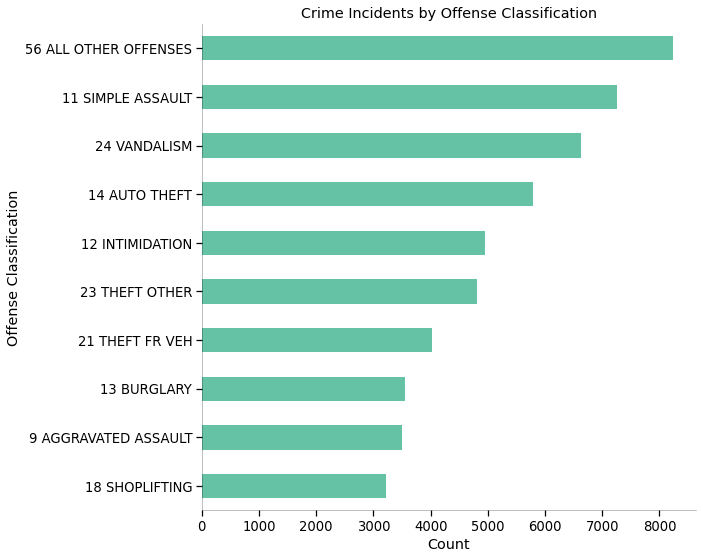

In [394]:
plt.figure(figsize=(10, 8))
df_2024['offense_classification'].value_counts().head(10)[::-1].plot(kind='barh')

plt.xlabel("Count")
plt.ylabel("Offense Classification")
plt.title("Crime Incidents by Offense Classification")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()



### What are 'All Other Offenses'?

"In crime datasets, 'All Other Offenses' (AOO) is a residual category for state/local law violations not specifically listed as major Part I or Part II crimes (like murder, theft, assault), but excluding traffic offenses, encompassing miscellaneous infractions like disorderly conduct, public intoxication, curfew violations, and other non-serious misdemeanors or local ordinance breaches, essentially catching everything else reported to police. 

What it includes (examples):
Disorderly Conduct: General public disturbance.
Drunkenness/Public Intoxication.
Curfew Violations: Especially for juveniles.
Loitering.
Trespassing (sometimes).
Vagrancy (in some systems).
Other minor violations of local ordinances or state laws not detailed elsewhere in the dataset."

In [395]:
auto_theft = df_2024[df_2024['offense_classification'] == '14 AUTO THEFT']
auto_theft['location_category'].value_counts()




PARKING/ DROP LOT/ GARAGE                 2099
RESIDENCE/HOME                            1846
HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK    1103
OTHER RESIDENCE (APARTMENT/CONDO)          300
AUTO DEALERSHIP NEW/USED                    65
OTHER/UNKNOWN                               51
COMMERCIAL/OFFICE BUILDING                  45
HOTEL/ MOTEL/ ETC.                          41
SERVICE/GAS STATION                         41
PARK/ PLAYGROUND                            19
SPECIALTY STORE                             19
DRUG STORE/DOCTOR'S OFFICE/HOSPITAL         16
CONVENIENCE STORE                           16
RESTAURANT                                  14
CONSTRUCTION SITE                           12
RENTAL STORAGE FACILITY                     11
CHURCH/SYNAGOGUE/TEMPLE/MOSQUE              11
INDUSTRIAL SITE                             10
GROCERY/ SUPERMARKET                         9
BAR/NIGHTCLUB                                7
SHELTER - MISSION/ HOMELESS                  6
SCHOOL - ELEM

# Advanced Data Viz - week 4 progress
- In the work below I clean and join all the datasets together, experiment with a seaborn style template for clean visuals, and begin theorizing new questions from a timeline chart.
- The data is clean and visuals improved, although more is to be done soon.

### Apply a Seaborn style to matplotlib (experimenting)

In [396]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [397]:
plt.style.use('seaborn-bright')
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("Set2")


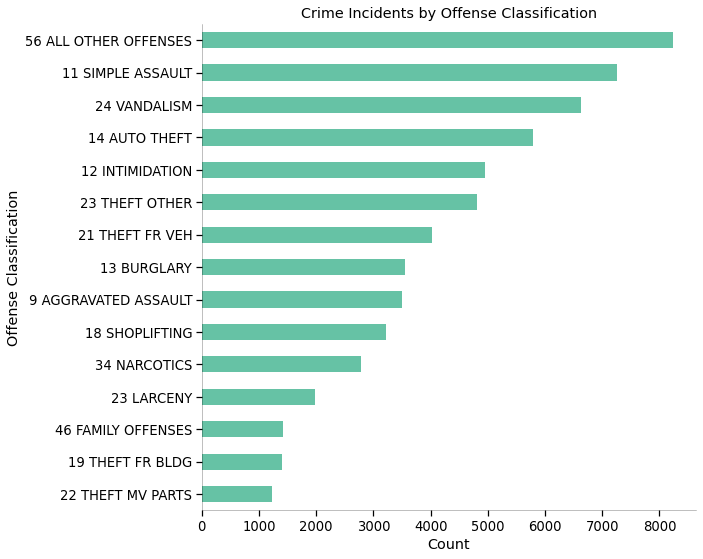

In [398]:
plt.figure(figsize=(10, 8))
df_2024['offense_classification'].value_counts().head(15)[::-1].plot(kind='barh')

plt.xlabel("Count")
plt.ylabel("Offense Classification")
plt.title("Crime Incidents by Offense Classification")

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

## Combining the datasets and adding a year column

- Much of the code is not together in one cell because I needed to see the column structure on top of each other step-by-step. Could be revised.
- Dropped ID and ObjectID columns due to ordering issues, redundancy, and lack of utility.
- Badge IDs weren't assigned until 2023 so older numbers are NaN (Policy change due to BT?)



### Adding a year column to each file

In [399]:
df_2003 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2003.csv')
df_2003['year'] = 2003

df_2004 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2004.csv')
df_2004['year'] = 2004

df_2005 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2005.csv')
df_2005['year'] = 2005

df_2006 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2006.csv')
df_2006['year'] = 2006

df_2007 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2007.csv')
df_2007['year'] = 2007

df_2008 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2008.csv')
df_2008['year'] = 2008

df_2009 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2009.csv')
df_2009['year'] = 2009

df_2010 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2010.csv')
df_2010['year'] = 2010

df_2011 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2011.csv')
df_2011['year'] = 2011

df_2012 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2012.csv')
df_2012['year'] = 2012

df_2013 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2013.csv')
df_2013['year'] = 2013

df_2014 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2014.csv')
df_2014['year'] = 2014

df_2015 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2015.csv')
df_2015['year'] = 2015

df_2016 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2016.csv')
df_2016['year'] = 2016

df_2017 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2017.csv')
df_2017['year'] = 2017

df_2018 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2018.csv')
df_2018['year'] = 2018

df_2019 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2019.csv')
df_2019['year'] = 2019

df_2020 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2020.csv')
df_2020['year'] = 2020

df_2021 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2021.csv')
df_2021['year'] = 2021

df_2022 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2022.csv')
df_2022['year'] = 2022

df_2023 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2023.csv')
df_2023['year'] = 2023

df_2024 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2024.csv')
df_2024['year'] = 2024

df_2025 = pd.read_csv('/Users/jonmarklarson/Projects/lou_crime_report/data/Crime_Data_2025.csv')
df_2025['year'] = 2025

/Users/jonmarklarson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jonmarklarson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jonmarklarson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/jonmarklarson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_n

In [400]:
# Check Results

df_2003.head(8)

,INCIDENT_NUMBER,DATE_REPORTED,DATE_OCCURED,UOR_DESC,CRIME_TYPE,NIBRS_CODE,UCR_HIERARCHY,ATT_COMP,LMPD_DIVISION,LMPD_BEAT,PREMISE_TYPE,BLOCK_ADDRESS,CITY,ZIP_CODE,ID,ObjectId,year
0,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,LOITERING FOR PROSTITUTION PURPOSES - 2ND > OF...,DISTURBING THE PEACE,40B,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,18600,1,2003
1,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,DISORDERLY CONDUCT,DISTURBING THE PEACE,90C,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,18601,2,2003
2,80-98-100100,1/13/98 11:30 AM,11/1/96 11:30 AM,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,123,HIGHWAY / ROAD / ALLEY,S 4TH ST / W BROADWAY ...,LOUISVILLE,40202.0,52848,3,2003
3,80-03-642283,11/20/03 2:00 PM,11/20/03 2:00 AM,THEFT BY UNLAWFUL TAKING/DISP - FROM BUILDING ...,THEFT/LARCENY,23D,PART I,COMPLETED,4TH DIVISION,411,DRUG STORE/DR`S OFFICE/HOSPITAL,800 BLOCK S 6TH ST ...,LOUISVILLE,40203.0,114063,4,2003
4,80-07-059478,4/2/99 4:40 AM,4/2/99 4:00 AM,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,4TH DIVISION,411,HIGHWAY / ROAD / ALLEY,100 BLOCK E JACOB ST ...,LOUISVILLE,40202.0,220191,5,2003
5,80-07-059480,11/9/00 4:00 AM,11/8/00 4:00 PM,RAPE-2ND DEGREE-NO FORCE,SEX CRIMES,36B,PART II,COMPLETED,4TH DIVISION,435,RESIDENCE / HOME,4300 BLOCK TUSCARORA WAY ...,LOUISVILLE,40215.0,220192,6,2003
6,80-07-059483,1/1/01 6:00 PM,12/23/00 4:00 AM,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,500 BLOCK WAINWRIGHT AVE ...,LOUISVILLE,40217.0,220311,7,2003
7,80-07-059483,1/1/01 6:00 PM,12/23/00 4:00 AM,SODOMY - 1ST DEGREE,OTHER,0,NaN,COMPLETED,4TH DIVISION,412,RESIDENCE / HOME,500 BLOCK WAINWRIGHT AVE ...,LOUISVILLE,40217.0,220312,8,2003


### Standardize column headers across all dataframes

In [401]:
# Dropped the ID column due to not being in recent years and lack of utility

df_2003 = df_2003.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2003 = df_2003.drop(columns=['ID'])
df_2003 = df_2003.drop(columns=['ObjectId'])

df_2003.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,LOITERING FOR PROSTITUTION PURPOSES - 2ND > OF...,DISTURBING THE PEACE,40B,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,2003
1,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,DISORDERLY CONDUCT,DISTURBING THE PEACE,90C,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,2003
2,80-98-100100,1/13/98 11:30 AM,11/1/96 11:30 AM,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,123,HIGHWAY / ROAD / ALLEY,S 4TH ST / W BROADWAY ...,LOUISVILLE,40202.0,2003
3,80-03-642283,11/20/03 2:00 PM,11/20/03 2:00 AM,THEFT BY UNLAWFUL TAKING/DISP - FROM BUILDING ...,THEFT/LARCENY,23D,PART I,COMPLETED,4TH DIVISION,411,DRUG STORE/DR`S OFFICE/HOSPITAL,800 BLOCK S 6TH ST ...,LOUISVILLE,40203.0,2003
4,80-07-059478,4/2/99 4:40 AM,4/2/99 4:00 AM,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,4TH DIVISION,411,HIGHWAY / ROAD / ALLEY,100 BLOCK E JACOB ST ...,LOUISVILLE,40202.0,2003


In [402]:
df_2004 = df_2004.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2004 = df_2004.drop(columns=['ID'])
df_2004 = df_2004.drop(columns=['ObjectId'])

df_2004.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-04-203312,1/29/04 10:20 AM,1/29/04 10:20 AM,OPER MOTOR VEH U/INFLUENCE ALC/DRUGS/ETC .08-...,DUI,90D,PART II,COMPLETED,2ND DIVISION,225,HIGHWAY / ROAD / ALLEY,S 23RD ST / W BURNETT AVE ...,LOUISVILLE,40210.0,2004
1,80-04-800064,5/22/04 10:20 PM,5/21/04 10:20 PM,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,4TH DIVISION,424,HIGHWAY / ROAD / ALLEY,700 BLOCK M ST ...,LOUISVILLE,40208.0,2004
2,80-04-203312,1/29/04 10:20 AM,1/29/04 10:20 AM,LEAVING SCENE OF ACCIDENT/FAILURE TO RENDER AI...,OTHER,0,NaN,COMPLETED,2ND DIVISION,225,HIGHWAY / ROAD / ALLEY,S 23RD ST / W BURNETT AVE ...,LOUISVILLE,40210.0,2004
3,80-04-203312,1/29/04 10:20 AM,1/29/04 10:20 AM,FAILURE OF OWNER TO MAINTAIN REQUIRED INS/SECU...,OTHER,90Z,PART II,COMPLETED,2ND DIVISION,225,HIGHWAY / ROAD / ALLEY,S 23RD ST / W BURNETT AVE ...,LOUISVILLE,40210.0,2004
4,80-04-137493,12/18/04 4:40 PM,12/18/04 4:00 AM,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,5200 BLOCK RUSSETT BLVD ...,LOUISVILLE,40218.0,2004


In [403]:
df_2005 = df_2005.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2005 = df_2005.drop(columns=['ID'])
df_2005 = df_2005.drop(columns=['ObjectId'])

df_2005.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-05-116395,6/2/05 8:30 AM,6/2/05 6:00 AM,THEFT BY UNLAWFUL TAKING/DISP - FROM BUILDING ...,THEFT/LARCENY,23D,PART I,COMPLETED,7TH DIVISION,736,"SPECIALTY STORE (TV, FUR, ETC)",8600 BLOCK PRESTON HWY ...,LOUISVILLE,40219.0,2005
1,80-05-116371,6/1/05 11:48 PM,6/1/05 4:00 PM,THEFT BY UNLAWFUL TAKING/DISP - FROM BUILDING ...,THEFT/LARCENY,23D,PART I,COMPLETED,7TH DIVISION,736,COMMERCIAL / OFFICE BUILDING,7100 BLOCK PRESTON HWY ...,LOUISVILLE,40219.0,2005
2,80-05-216622,5/23/05 12:20 PM,5/23/05 8:00 AM,POSS CONT SUB-1ST DEGREE-1ST OFFENSE-COCAINE,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,2ND DIVISION,211,RESIDENCE / HOME,3900 BLOCK VERMONT AVE ...,LOUISVILLE,40211.0,2005
3,80-05-216622,5/23/05 12:20 PM,5/23/05 8:00 AM,LOITERING,DISTURBING THE PEACE,90B,PART II,COMPLETED,2ND DIVISION,211,RESIDENCE / HOME,3900 BLOCK VERMONT AVE ...,LOUISVILLE,40211.0,2005
4,80-05-217770,6/1/05 5:20 AM,5/31/05 8:00 PM,THEFT BY UNLAWFUL TAKING/DISP-ALL OTHERS -MISD,THEFT/LARCENY,23H,PART I,COMPLETED,4TH DIVISION,435,RESIDENCE / HOME,4400 BLOCK MALCOLM AVE ...,LOUISVILLE,40215.0,2005


In [404]:
df_2006 = df_2006.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2006 = df_2006.drop(columns=['ID'])
df_2006 = df_2006.drop(columns=['ObjectId'])

df_2006.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-06-107478,3/15/06 3:20 AM,2/25/06 12:00 AM,CACU UNSUBSTANTIATED CASES,OTHER,0,NaN,ATTEMPTED,3RD DIVISION,316,RESIDENCE / HOME,7000 BLOCK SHIPLEY LN ...,LOUISVILLE,40272.0,2006
1,80-06-209101,3/11/06 3:00 PM,3/11/06 3:00 PM,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,COMPLETED,4TH DIVISION,424,RESIDENCE / HOME,3800 BLOCK SOUTHERN PKY ...,LOUISVILLE,40214.0,2006
2,80-06-105717,2/25/06 7:30 AM,2/25/06 7:30 AM,TRAF CONT SUB-1ST DEGREE-1ST OFFENSE-COCAINE,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,6TH DIVISION,612,PARKING LOT / GARAGE,4600 BLOCK POPLAR LEVEL RD ...,LOUISVILLE,40213.0,2006
3,80-06-105717,2/25/06 7:30 AM,2/25/06 7:30 AM,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,6TH DIVISION,612,PARKING LOT / GARAGE,4600 BLOCK POPLAR LEVEL RD ...,LOUISVILLE,40213.0,2006
4,80-06-105717,2/25/06 7:30 AM,2/25/06 7:30 AM,DRUG PARAPHERNALIA-BUY/POSSESS-1ST OFFENSE,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,6TH DIVISION,612,PARKING LOT / GARAGE,4600 BLOCK POPLAR LEVEL RD ...,LOUISVILLE,40213.0,2006


In [405]:
df_2007 = df_2007.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2007 = df_2007.drop(columns=['ID'])
df_2007 = df_2007.drop(columns=['ObjectId'])

df_2007.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-07-027981,4/21/07 11:00 PM,4/21/07 7:30 PM,POSS CONT SUB-1ST DEGREE-1ST OFFENSE-COCAINE,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,8TH DIVISION,815,HIGHWAY / ROAD / ALLEY,LA GRANGE RD / LISBON AVE ...,LOUISVILLE,40222.0,2007
1,80-07-002094,1/9/07 7:22 PM,1/9/07 7:22 PM,POSS CONT SUB-1ST DEGREE-1ST OFFENSE-DRUG UNSP...,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,6TH DIVISION,624,BAR / NIGHT CLUB,2100 BLOCK BUECHEL BANK RD ...,LOUISVILLE,40218.0,2007
2,80-07-006003,1/25/07 1:28 AM,1/24/07 10:00 PM,THEFT BY UNLAWFUL TAKING/DISP-ALL OTHERS - FEL...,THEFT/LARCENY,23H,PART I,COMPLETED,1ST DIVISION,111,HIGHWAY / ROAD / ALLEY,S 15TH ST / PIRTLE ST ...,LOUISVILLE,40203.0,2007
3,80-07-009105,2/6/07 11:26 PM,2/6/07 11:26 PM,OPER MOTOR VEH U/INFLUENCE ALC/DRUGS/ETC .08- ...,DUI,90D,PART II,COMPLETED,8TH DIVISION,811,HIGHWAY / ROAD / ALLEY,CHAMBERLAIN LN ...,LOUISVILLE,40241.0,2007
4,80-07-003306,1/13/07 11:50 AM,1/13/07 10:50 AM,THEFT BY UNLAWFUL TAKING/DISP-CONTENTS FROM AU...,VEHICLE BREAK-IN/THEFT,23F,PART I,COMPLETED,4TH DIVISION,412,HIGHWAY / ROAD / ALLEY,1200 BLOCK SCHILLER AVE ...,LOUISVILLE,40204.0,2007


In [406]:
df_2008 = df_2008.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2008 = df_2008.drop(columns=['ID'])
df_2008 = df_2008.drop(columns=['ObjectId'])

df_2008.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-08-057101,7/31/08 10:12 PM,7/31/08 10:12 PM,DRUG PARAPHERNALIA-BUY/POSSESS-2ND OR > OFFENSE,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,BALDWIN ST / WILSON AVE ...,LOUISVILLE,40210.0,2008
1,80-08-055145,7/25/08 4:00 PM,7/25/08 4:00 PM,POSS CONT SUB-3RD DEGREE-1ST OFFENSE-DRUG UNSP...,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,7TH DIVISION,735,HIGHWAY / ROAD / ALLEY,CHARIOT CT / SHEPHERDSVILLE RD ...,LOUISVILLE,40219.0,2008
2,80-08-055718,7/28/08 1:00 PM,7/27/08 8:54 PM,THEFT BY UNLAWFUL TAKING/DISP - FROM BUILDING ...,THEFT/LARCENY,23D,PART I,COMPLETED,1ST DIVISION,135,BAR / NIGHT CLUB,100 BLOCK E JEFFERSON ST ...,LOUISVILLE,40202.0,2008
3,80-08-060400,8/11/08 9:16 PM,8/11/08 9:16 PM,DOMESTIC ABUSE DUTIES OF LAW ENFORCEMENT,OTHER,90Z,PART II,COMPLETED,6TH DIVISION,625,RESIDENCE / HOME,1700 BLOCK SOMERSET PL ...,HURSTBOURNE_ACRES,40220.0,2008
4,80-08-060193,8/11/08 10:38 AM,8/8/08 8:00 PM,THEFT BY UNLAWFUL TAKING/DISP-FROM BUILDING - ...,THEFT/LARCENY,23D,PART I,COMPLETED,7TH DIVISION,712,CONSTRUCTION SITE,8700 BLOCK CHETWOOD TRACE DR ...,LOUISVILLE,40291.0,2008


In [407]:
df_2009 = df_2009.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2009 = df_2009.drop(columns=['ID'])
df_2009 = df_2009.drop(columns=['ObjectId'])

df_2009.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-09-039730,6/2/09 1:18 AM,6/2/09 1:18 AM,CARRYING A CONCEALED DEADLY WEAPON,WEAPONS,520,PART II,COMPLETED,1ST DIVISION,112,SCHOOL - ELEMENTARY / SECONDARY,S 19TH ST / CONGRESS ST ...,LOUISVILLE,40203,2009
1,80-09-057282,8/2/09 10:16 PM,8/2/09 9:56 PM,RECEIVING STOLEN PROPERTY U/$500 MISD,THEFT/LARCENY,280,PART II,COMPLETED,2ND DIVISION,225,HIGHWAY / ROAD / ALLEY,S 13TH ST / ALGONQUIN PKY ...,LOUISVILLE,40210,2009
2,80-09-083722,11/3/09 10:44 PM,11/3/09 10:44 PM,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,8TH DIVISION,811,HIGHWAY / ROAD / ALLEY,BROWNSBORO RD / GLASGOW BLVD ...,LOUISVILLE,40241,2009
3,80-08-099877,1/1/09 6:14 AM,12/31/08 12:07 PM,CRIMINAL MISCHIEF-2ND DEGREE,VANDALISM,290,PART II,COMPLETED,3RD DIVISION,323,PARKING LOT / GARAGE,10800 BLOCK JUNEBERRY CT ...,LOUISVILLE,40272,2009
4,80-08-099898,1/1/09 8:28 AM,12/30/08 9:00 PM,CRIMINAL MISCHIEF - 1ST DEGREE,VANDALISM,290,PART II,COMPLETED,6TH DIVISION,613,PARKING LOT / GARAGE,1300 BLOCK GARDINER LN ...,LOUISVILLE,40213,2009


In [408]:
df_2010 = df_2010.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2010 = df_2010.drop(columns=['ID'])
df_2010 = df_2010.drop(columns=['ObjectId'])
  
df_2010.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-10-023517,4/2/10 5:07 PM,4/2/10 6:00 AM,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,6TH DIVISION,624,OTHER / UNKNOWN,5500 BLOCK RANDOM WAY ...,LOUISVILLE,40291,2010
1,80-10-024222,4/5/10 3:52 PM,4/3/10 9:00 PM,BURGLARY - 3RD DEGREE,BURGLARY,220,PART I,ATTEMPTED,3RD DIVISION,331,OTHER / UNKNOWN,4800 BLOCK KAUFMAN LN ...,LOUISVILLE,40216,2010
2,80-10-023611,4/3/10 1:40 AM,4/3/10 1:20 AM,DRUG PARAPHERNALIA-BUY/POSSESS-2ND OR > OFFENSE,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,6TH DIVISION,625,HIGHWAY / ROAD / ALLEY,FURMAN BLVD / ALLISON WAY ...,LOUISVILLE,40220,2010
3,80-10-010192,2/11/10 7:46 PM,2/11/10 7:46 PM,POSS CONTROLLED SUB 1ST DEGREE 1ST OFF (METHAM...,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,3RD DIVISION,331,RESIDENCE / HOME,7000 BLOCK BEECHLAND AVE ...,LOUISVILLE,40258,2010
4,80-10-024256,4/5/10 5:58 PM,4/5/10 5:58 PM,BURGLARY - 2ND DEGREE,BURGLARY,220,PART I,COMPLETED,4TH DIVISION,424,RESIDENCE / HOME,700 BLOCK CREEL AVE ...,LOUISVILLE,40208,2010


In [409]:
df_2011 = df_2011.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2011 = df_2011.drop(columns=['ID'])
df_2011 = df_2011.drop(columns=['ObjectId'])
  
df_2011.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-11-022929,3/29/11 9:31 PM,3/29/11 9:31 PM,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,111,RESIDENCE / HOME,3000 BLOCK BANK ST ...,LVIL,40212.0,2011
1,80-11-021951,3/26/11 12:49 AM,3/26/11 12:49 AM,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,5TH DIVISION,513,PARKING LOT / GARAGE,1500 BLOCK BARDSTOWN RD ...,LOUISVILLE,40205.0,2011
2,80-11-033117,5/2/11 11:20 PM,5/2/11 10:46 PM,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,3RD DIVISION,322,"SPECIALTY STORE (TV, FUR, ETC)",7000 BLOCK SOUTHSIDE DR ...,LOUISVILLE,40214.0,2011
3,80-11-022942,3/29/11 10:29 PM,3/29/11 10:29 PM,ASSAULT - 4TH DEGREE (DOMESTIC VIOLENCE) NO VI...,ASSAULT,13B,PART II,COMPLETED,2ND DIVISION,212,RESIDENCE / HOME,3700 BLOCK GREENWOOD AVE ...,LVIL,40211.0,2011
4,80-11-026517,4/10/11 6:20 PM,4/10/11 6:20 PM,LEAVING SCENE OF ACCIDENT - HIT & RUN,OTHER,999,NaN,COMPLETED,3RD DIVISION,323,HIGHWAY / ROAD / ALLEY,NATIONAL TPKE ...,LOUISVILLE,40214.0,2011


In [410]:
df_2012 = df_2012.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2012 = df_2012.drop(columns=['ID'])
df_2012 = df_2012.drop(columns=['ObjectId'])
  
df_2012.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-12-034260,5/1/12 7:48 PM,5/1/12 7:48 PM,SEXUAL ABUSE - 1ST DEGREE- VICTIM U/12 YOA,SEX CRIMES,11D,PART II,COMPLETED,2ND DIVISION,211,RESIDENCE / HOME,300 BLOCK S 38TH ST ...,LOUISVILLE,40212.0,2012
1,80-12-088974,11/8/12 11:34 AM,11/7/12 8:30 PM,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,3RD DIVISION,331,HIGHWAY / ROAD / ALLEY,8200 BLOCK GRANDEL PL ...,LOUISVILLE,40258.0,2012
2,80-12-069822,9/1/12 6:13 AM,9/1/12 12:00 AM,SEXUAL ABUSE - 1ST DEGREE- VICTIM U/12 YOA,SEX CRIMES,11D,PART II,COMPLETED,2ND DIVISION,211,RESIDENCE / HOME,3600 BLOCK W MUHAMMAD ALI BLVD ...,LOUISVILLE,40212.0,2012
3,80-12-018027,3/7/12 9:38 PM,3/7/12 9:04 PM,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,3RD DIVISION,331,OTHER / UNKNOWN,ELMORE ST / GRASTON AVE ...,LOUISVILLE,40216.0,2012
4,80-12-018027,3/7/12 9:38 PM,3/7/12 9:04 PM,DRUG PARAPHERNALIA - BUY/POSSESS,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,3RD DIVISION,331,OTHER / UNKNOWN,ELMORE ST / GRASTON AVE ...,LOUISVILLE,40216.0,2012


In [411]:
df_2013 = df_2013.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2013 = df_2013.drop(columns=['ID'])
df_2013 = df_2013.drop(columns=['ObjectId'])
  
df_2013.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-13-078742,10/13/13 9:36 PM,10/13/13 9:25 PM,CRIMINAL MISCHIEF - 1ST DEGREE,VANDALISM,290,PART II,COMPLETED,2ND DIVISION,212,RESIDENCE / HOME,800 BLOCK S 38TH ST ...,LOUISVILLE,40211.0,2013
1,80-13-045825,6/21/13 2:54 PM,5/1/13 12:00 AM,"TBUT OR DISP ALL OTHERS $10,000 OR > BUT < $1...",THEFT/LARCENY,23H,PART I,COMPLETED,8TH DIVISION,824,HIGHWAY / ROAD / ALLEY,2000 BLOCK STANLEY GAULT PKY ...,LOUISVILLE,40223.0,2013
2,80-13-027653,4/19/13 11:32 PM,4/19/13 3:00 PM,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,1ST DIVISION,111,OTHER / UNKNOWN,PARK - PORTLAND WHARF PARK ...,LOUISVILLE,40212.0,2013
3,80-13-016472,3/8/13 2:13 PM,1/1/13 12:00 AM,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,METRO LOUISVILLE,METRO,RESIDENCE / HOME,COMMUNITY AT LARGE,LOUISVILLE,NaN,2013
4,80-13-011531,2/15/13 10:58 PM,2/15/13 10:58 PM,DRUG PARAPHERNALIA - BUY/POSSESS,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,4TH DIVISION,412,HIGHWAY / ROAD / ALLEY,FETTER AVE / KESWICK BLVD ...,LOUISVILLE,40217.0,2013


In [412]:
df_2014 = df_2014.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2014 = df_2014.drop(columns=['ID'])
df_2014 = df_2014.drop(columns=['ObjectId'])
  
df_2014.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-14-048074,6/30/14 10:46 AM,6/29/14 9:00 PM,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,4TH DIVISION,424,HIGHWAY / ROAD / ALLEY,2900 BLOCK S 3RD ST ...,LOUISVILLE,40208.0,2014
1,80-14-004033,1/16/14 6:20 PM,1/16/14 2:45 PM,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,6TH DIVISION,612,OTHER / UNKNOWN,5300 BLOCK PRESTON HWY ...,LOUISVILLE,40213.0,2014
2,80-14-057665,8/3/14 7:48 AM,7/28/14 3:54 PM,RECEIVING STOLEN PROPERTY U/$500 MISD,THEFT/LARCENY,280,PART II,COMPLETED,3RD DIVISION,331,OTHER / UNKNOWN,6400 BLOCK TRIPLETT WOODS DR ...,LOUISVILLE,40216.0,2014
3,80-14-092782,12/2/14 10:50 PM,11/28/14 8:00 PM,"RECEIVING STOLEN PROPERTY U/$10,000",THEFT/LARCENY,280,PART II,COMPLETED,1ST DIVISION,123,PARKING LOT / GARAGE,400 BLOCK W MAIN ST ...,LOUISVILLE,40202.0,2014
4,80-14-092782,12/2/14 10:50 PM,11/28/14 8:00 PM,CRIMINAL POSSESSION FORGED INSTRUMENT-1ST DEGR...,FRAUD,250,PART II,COMPLETED,1ST DIVISION,123,PARKING LOT / GARAGE,400 BLOCK W MAIN ST ...,LOUISVILLE,40202.0,2014


In [413]:
df_2015 = df_2015.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2015 = df_2015.drop(columns=['ID'])
df_2015 = df_2015.drop(columns=['ObjectId'])
  
df_2015.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-15-095254,11/23/15 8:30 AM,11/22/15 11:00 PM,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,7TH DIVISION,712,OTHER RESIDENCE (APARTMENT/CONDO),10500 BLOCK GLENMARY FARM DR ...,LOUISVILLE,40291,2015
1,80-15-075641,9/21/15 4:00 PM,9/21/15 4:00 PM,CRIMINAL MISCHIEF - 1ST DEGREE,VANDALISM,290,PART II,COMPLETED,3RD DIVISION,331,HIGHWAY / ROAD / ALLEY,3600 BLOCK BAYMEADOW DR ...,LOUISVILLE,40258,2015
2,80-15-048869,6/25/15 6:19 PM,6/25/15 6:19 PM,DRUG PARAPHERNALIA - BUY/POSSESS,DRUGS/ALCOHOL VIOLATIONS,35B,PART II,COMPLETED,3RD DIVISION,331,HIGHWAY / ROAD / ALLEY,BLANTON LN / ST ANDREWS CHURCH RD ...,LOUISVILLE,40214,2015
3,80-15-073460,9/14/15 3:27 PM,8/26/15 12:00 PM,SEXUAL ABUSE - 1ST DEGREE,SEX CRIMES,11D,PART II,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,5200 BLOCK BROADMOOR BLVD ...,LOUISVILLE,40218,2015
4,80-15-080965,10/8/15 10:03 AM,10/8/15 10:03 AM,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,6TH DIVISION,611,HIGHWAY / ROAD / ALLEY,I 264 RAMP / I 264 RAMP ...,LOUISVILLE,40213,2015


In [414]:
df_2016 = df_2016.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2016 = df_2016.drop(columns=['ID'])
df_2016 = df_2016.drop(columns=['ObjectId'])
  
df_2016.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-16-080765,9/20/16 12:42 PM,9/14/16 7:30 AM,HARASSMENT (NO PHYSICAL CONTACT),ASSAULT,13C,PART II,COMPLETED,5TH DIVISION,525,RESIDENCE / HOME,3900 BLOCK LELAND RD ...,BELLEWOOD,40207.0,2016
1,80-16-064276,7/29/16 2:38 PM,7/28/16 11:30 PM,RECEIVING STOLEN PROPERTY (FIREARM),THEFT/LARCENY,280,PART II,COMPLETED,7TH DIVISION,723,RESIDENCE / HOME,8400 BLOCK SILVER FOX RD ...,LOUISVILLE,40291.0,2016
2,80-16-000805,3/7/16 9:59 AM,2/28/04 12:00 AM,COLD CASE REPORT NUMBER,OTHER,999,NaN,COMPLETED,4TH DIVISION,412,OTHER / UNKNOWN,700 BLOCK S SHELBY ST ...,LOUISVILLE,40203.0,2016
3,80-16-099509,11/21/16 9:53 AM,1/18/04 8:00 PM,COLD CASE REPORT NUMBER,OTHER,999,NaN,COMPLETED,2ND DIVISION,225,OTHER / UNKNOWN,1400 BLOCK STANDARD VILLAGE CIR ...,LOUISVILLE,40210.0,2016
4,80-16-099506,11/21/16 9:53 AM,7/19/04 7:00 PM,COLD CASE REPORT NUMBER,OTHER,999,NaN,COMPLETED,4TH DIVISION,436,OTHER / UNKNOWN,100 BLOCK E WOODLAWN AVE ...,LOUISVILLE,40214.0,2016


In [415]:
df_2017 = df_2017.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2017 = df_2017.drop(columns=['ID'])
df_2017 = df_2017.drop(columns=['ObjectId'])
  
df_2017.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-17-055936,7/11/17 8:49 PM,7/11/17 8:49 PM,TBUT OR DISP ALL OTHERS < $500,THEFT/LARCENY,23H,PART I,COMPLETED,4TH DIVISION,424,RESIDENCE / HOME,600 BLOCK WINKLER AVE ...,LOUISVILLE,40208,2017
1,80-17-055900,7/11/17 5:47 PM,7/11/17 5:47 PM,VIOLATION OF KENTUCKY EPO/DVO,ASSAULT,90F,PART II,COMPLETED,1ST DIVISION,111,RESIDENCE / HOME,2900 BLOCK BANK ST ...,LOUISVILLE,40212,2017
2,80-17-055660,7/10/17 11:37 PM,7/10/17 6:30 PM,CRIMINAL MISCHIEF-3RD DEGREE,VANDALISM,290,PART II,COMPLETED,1ST DIVISION,123,PARKING LOT / GARAGE,600 BLOCK S 4TH ST ...,LOUISVILLE,40202,2017
3,80-17-055948,7/11/17 9:50 PM,7/11/17 8:34 PM,ASSAULT - 4TH DEGREE (MINOR INJURY),ASSAULT,13B,PART II,COMPLETED,2ND DIVISION,234,RESIDENCE / HOME,3300 BLOCK HUDSON AVE ...,LOUISVILLE,40211,2017
4,80-17-056076,7/13/17 10:53 AM,7/12/17 8:00 AM,HARASSING COMMUNICATIONS,OTHER,90Z,PART II,COMPLETED,7TH DIVISION,736,CHILD DAYCARE FACILITY,9200 BLOCK BLUE LICK RD ...,LOUISVILLE,40229,2017


In [416]:
df_2018 = df_2018.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2018 = df_2018.drop(columns=['ID'])
df_2018 = df_2018.drop(columns=['ObjectId'])
  
df_2018.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-18-023451,3/30/18 11:44 AM,3/28/18 11:00 PM,BURGLARY - 3RD DEGREE,BURGLARY,220,PART I,COMPLETED,3RD DIVISION,315,NON-ATTACHED RESD GARAGE/SHED/BULD,8700 BLOCK TERRY RD ...,LOUISVILLE,40258.0,2018
1,80-18-026875,4/13/18 5:36 AM,3/12/18 2:00 PM,TBUT OR DISP FROM BUILDING < $500,THEFT/LARCENY,23D,PART I,COMPLETED,5TH DIVISION,513,"SPECIALTY STORE (TV, FUR, ETC)",2200 BLOCK BARDSTOWN RD ...,LOUISVILLE,40205.0,2018
2,80-18-084991,10/30/18 7:08 AM,10/27/18 1:13 AM,OBSCURING THE IDENTITY OF A MACHINE U/$10000,FRAUD,26A,PART II,COMPLETED,8TH DIVISION,824,HIGHWAY / ROAD / ALLEY,11900 BLOCK SHELBYVILLE RD ...,LOUISVILLE,40243.0,2018
3,80-18-023451,3/30/18 11:44 AM,3/28/18 11:00 PM,BURGLARY - 3RD DEGREE,BURGLARY,220,PART I,COMPLETED,3RD DIVISION,315,NON-ATTACHED RESD GARAGE/SHED/BULD,8700 BLOCK TERRY RD ...,LOUISVILLE,40258.0,2018
4,80-18-025979,4/9/18 3:10 PM,4/9/18 3:10 PM,POSS OF MARIJUANA,DRUGS/ALCOHOL VIOLATIONS,35A,PART II,COMPLETED,2ND DIVISION,212,HIGHWAY / ROAD / ALLEY,S 36TH ST / VIRGINIA AVE ...,LOUISVILLE,40211.0,2018


In [417]:
df_2019 = df_2019.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'City': 'city',  # Note: City not CITY for 2019
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2019 = df_2019.drop(columns=['ObjectId'])

df_2019.head()

,incident_number,date_reported,date_occurred,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,80-19-000105,2019/01/01 11:22:00,2019/01/01 02:00:00,DRUGS/ALCOHOL VIOLATIONS,POSS OF MARIJUANA,35A,PART II,COMPLETED,8TH DIVISION,815,RESIDENCE / HOME,8200 BLOCK NOTTINGHAM PKY ...,HURSTBOURNE,40222,2019
1,80-19-000107,2019/01/01 11:43:00,2019/01/01 11:30:00,ASSAULT,ASSAULT - 4TH DEGREE (MINOR INJURY),13B,PART II,COMPLETED,1ST DIVISION,135,HOMELESS SHELTER / MISSION,400 BLOCK E JEFFERSON ST ...,LOUISVILLE,40202,2019
2,80-19-000108,2019/01/01 12:09:00,2019/01/01 11:51:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,6TH DIVISION,625,OTHER / UNKNOWN,2900 BLOCK KLONDIKE LN ...,LOUISVILLE,40218,2019
3,80-19-500001,2019/01/01 12:03:00,2018/12/31 20:00:00,VANDALISM,CRIMINAL MISCHIEF-3RD DEGREE,290,PART II,COMPLETED,3RD DIVISION,315,RESIDENCE / HOME,8200 BLOCK TERRY RD ...,LOUISVILLE,40258,2019
4,80-19-000110,2019/01/01 12:19:00,2019/01/01 08:30:00,MOTOR VEHICLE THEFT,"TBUT OR DISP AUTO > $500 BUT < $10,000",240,PART I,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,3500 BLOCK FLEETWOOD DR ...,LOUISVILLE,40218,2019


In [418]:
df_2020 = df_2020.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2020 = df_2020.drop(columns=['ObjectId'])
  
df_2020.head()

,incident_number,date_reported,date_occurred,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,City,zip_code,year
0,80-20-000117,2020-01-01 13:50:00,2019-12-31 03:30:00,FRAUD,FRAUD USE OF CREDIT CARD AFTER REPT LOST/STOLE...,26B,PART II,COMPLETED,4TH DIVISION,435,SERVICE / GAS STATION,4100 BLOCK TAYLOR BLVD ...,LOUISVILLE,40215,2020
1,80-20-000292,2020-01-02 10:45:00,2019-12-31 18:00:00,THEFT/LARCENY,"TBUT OR DISP ALL OTHERS > $500 BUT < $10,000",23H,PART I,COMPLETED,6TH DIVISION,613,NON-ATTACHED RESD GARAGE/SHED/BULD,5200 BLOCK RUSSETT BLVD ...,LOUISVILLE,40218,2020
2,80-19-096135,2020-01-01 00:26:00,2019-12-31 23:30:00,VEHICLE BREAK-IN/THEFT,TBUT OR DISP CONTENTS FROM VEH $500 OR > BUT <...,23F,PART I,COMPLETED,1ST DIVISION,112,HIGHWAY / ROAD / ALLEY,S 16TH ST / W CHESTNUT ST ...,LOUISVILLE,40203,2020
3,80-20-000234,2020-01-01 23:57:00,2020-01-01 03:00:00,VANDALISM,CRIMINAL MISCHIEF-2ND DEGREE,290,PART II,COMPLETED,4TH DIVISION,424,HIGHWAY / ROAD / ALLEY,2700 BLOCK S 4TH ST ...,LOUISVILLE,40208,2020
4,80-20-000294,2020-01-02 11:02:00,2019-12-31 12:00:00,VEHICLE BREAK-IN/THEFT,TBUT OR DISP CONTENTS FROM VEH $500 OR > BUT <...,23F,PART I,COMPLETED,7TH DIVISION,736,DOCK/WHARF/FREIGHT/MODAL TERMINAL,1800 BLOCK SOUTH PARK RD ...,LOUISVILLE,40219,2020


In [419]:
df_2021 = df_2021.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})

df_2021 = df_2021.drop(columns=['ObjectId'])
  
df_2021.head()

,incident_number,date_reported,date_occurred,BADGE_ID,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,City,zip_code,year
0,80-21-000052,2021-01-01 04:49:00,2021-01-01 04:36:00,5146,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,290,PART II,COMPLETED,6TH DIVISION,625,RESIDENCE / HOME,9400 BLOCK DORAL CT ...,LOUISVILLE,40220.0,2021
1,80-20-077625,2021-01-01 04:10:00,2020-12-31 20:00:00,8403,VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE,290,PART II,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,4100 BLOCK ST FRANCIS LN ...,LOUISVILLE,40218.0,2021
2,80-21-000052,2021-01-01 04:49:00,2021-01-01 04:36:00,5146,WEAPONS,POSSESSION OF HANDGUN BY CONVICTED FELON,520,PART II,COMPLETED,6TH DIVISION,625,RESIDENCE / HOME,9400 BLOCK DORAL CT ...,LOUISVILLE,40220.0,2021
3,80-21-000143,2021-01-01 16:15:00,2021-01-01 15:55:00,7328,OTHER,DOMESTIC ABUSE DUTIES OF LAW ENFORCEMENT,90Z,PART II,COMPLETED,7TH DIVISION,712,RESIDENCE / HOME,6600 BLOCK BILLTOWN RD ...,LOUISVILLE,40299.0,2021
4,80-20-077625,2021-01-01 04:10:00,2020-12-31 20:00:00,8403,BURGLARY,BURGLARY - 2ND DEGREE,220,PART I,COMPLETED,6TH DIVISION,613,RESIDENCE / HOME,4100 BLOCK ST FRANCIS LN ...,LOUISVILLE,40218.0,2021


In [420]:
df_2022 = df_2020.rename(columns={
    'INCIDENT_NUMBER': 'incident_number',
    'DATE_REPORTED': 'date_reported',
    'DATE_OCCURED': 'date_occurred',
    'UOR_DESC': 'offense_code_name',
    'CRIME_TYPE': 'offense_classification',
    'NIBRS_CODE': 'nibrs_code',
    'UCR_HIERARCHY': 'nibrs_group_name',
    'ATT_COMP': 'was_offense_completed',
    'LMPD_DIVISION': 'lmpd_division',
    'LMPD_BEAT': 'lmpd_beat',
    'PREMISE_TYPE': 'location_category',
    'BLOCK_ADDRESS': 'block_address',
    'CITY': 'city',
    'ZIP_CODE': 'zip_code',
    'ObjectId': 'ObjectId'
})
  
df_2022.head()

,incident_number,date_reported,date_occurred,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,City,zip_code,year
0,80-20-000117,2020-01-01 13:50:00,2019-12-31 03:30:00,FRAUD,FRAUD USE OF CREDIT CARD AFTER REPT LOST/STOLE...,26B,PART II,COMPLETED,4TH DIVISION,435,SERVICE / GAS STATION,4100 BLOCK TAYLOR BLVD ...,LOUISVILLE,40215,2020
1,80-20-000292,2020-01-02 10:45:00,2019-12-31 18:00:00,THEFT/LARCENY,"TBUT OR DISP ALL OTHERS > $500 BUT < $10,000",23H,PART I,COMPLETED,6TH DIVISION,613,NON-ATTACHED RESD GARAGE/SHED/BULD,5200 BLOCK RUSSETT BLVD ...,LOUISVILLE,40218,2020
2,80-19-096135,2020-01-01 00:26:00,2019-12-31 23:30:00,VEHICLE BREAK-IN/THEFT,TBUT OR DISP CONTENTS FROM VEH $500 OR > BUT <...,23F,PART I,COMPLETED,1ST DIVISION,112,HIGHWAY / ROAD / ALLEY,S 16TH ST / W CHESTNUT ST ...,LOUISVILLE,40203,2020
3,80-20-000234,2020-01-01 23:57:00,2020-01-01 03:00:00,VANDALISM,CRIMINAL MISCHIEF-2ND DEGREE,290,PART II,COMPLETED,4TH DIVISION,424,HIGHWAY / ROAD / ALLEY,2700 BLOCK S 4TH ST ...,LOUISVILLE,40208,2020
4,80-20-000294,2020-01-02 11:02:00,2019-12-31 12:00:00,VEHICLE BREAK-IN/THEFT,TBUT OR DISP CONTENTS FROM VEH $500 OR > BUT <...,23F,PART I,COMPLETED,7TH DIVISION,736,DOCK/WHARF/FREIGHT/MODAL TERMINAL,1800 BLOCK SOUTH PARK RD ...,LOUISVILLE,40219,2020


In [421]:
df_2023 = df_2023.drop(columns=['ObjectId'])

df_2023.head()


,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,LMPD25142513,11/29/2025 7:07:00 PM,11/29/2023 7:00:00 PM,5810.0,23 LARCENY,"TBUT OR DISP ALL OTHERS $1,000 < $10,000 514.0...",23H,A,YES,4TH DIVISION,412,HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK,300 BLOCK W CARDINAL BLVD,LOUISVILLE,40208,2023
1,LMPD25134300,11/11/2025 2:48:00 PM,7/20/2023 4:00:00 AM,8560.0,56 ALL OTHER OFFENSES,PROPERTY LOST OR ABANDONED NON CRIMINAL 67.592...,90Z,B,NO,4TH DIVISION,411,RESIDENCE/HOME,1400 BLOCK S 4TH ST,LOUISVILLE,40208,2023
2,LMPD25131896,11/5/2025 10:19:00 PM,9/30/2023 4:00:00 AM,8515.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,YES,3RD DIVISION,334,RESIDENCE/HOME,4700 BLOCK PALMA RD,LOUISVILLE,40272 0000,2023
3,LMPD25128330,10/28/2025 8:47:00 PM,2/20/2023 5:00:00 AM,8702.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,3RD DIVISION,315,CYBERSPACE,9200 BLOCK DONERAIL WAY,LOUISVILLE,40272,2023
4,LMPD25127625,10/27/2025 1:44:00 PM,4/12/2023 4:00:00 AM,8560.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,7TH DIVISION,723,RESIDENCE/HOME,8800 BLOCK MOUNT GERALD CT,LOUISVILLE,40291,2023


In [422]:
df_2024 = df_2024.drop(columns=['ObjectId'])

df_2024.head()



,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,LMPD25144947,12/5/2025 5:28:00 PM,11/16/2024 5:00:00 AM,8701.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,4TH DIVISION,424,RESIDENCE/HOME,500 BLOCK LONGFIELD AVE,LOUISVILLE,40215,2024
1,LMPD25140113,11/24/2025 4:22:00 AM,7/9/2024 4:00:00 AM,8631.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,8TH DIVISION,824,RESIDENCE/HOME,100 BLOCK LA FONTENAY DR,DOUGLASS HILLS,40223,2024
2,LMPD25139843,11/23/2025 2:37:00 PM,11/15/2024 9:00:00 PM,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,YES,2ND DIVISION,223,HIGHWAY/ ROAD/ ALLEY/ STREET/ SIDEWALK,1300 BLOCK S 26TH ST,LOUISVILLE,40210,2024
3,LMPD25138669,11/20/2025 8:54:00 PM,1/1/2024 5:01:00 AM,8646.0,29 FRAUD IMPERSONATION,THEFT OF IDENTITY OF ANOTHER WITHOUT CONSENT 5...,26C,A,YES,1ST DIVISION,111,RESIDENCE/HOME,2400 BLOCK NORTHWESTERN PKWY,LOUISVILLE,40212,2024
4,LMPD25138625,11/20/2025 7:29:00 PM,10/29/2024 4:00:00 PM,8544.0,23 THEFT OTHER,"THEFT BY DECEPTION INCLUDING COLD CHECKS $1,00...",23H,A,YES,3RD DIVISION,323,RESIDENCE/HOME,200 BLOCK ANGELETTA WAY,LOUISVILLE,40214,2024


In [423]:
df_2025 = df_2025.drop(columns=['ObjectId'])

df_2025.head()



,incident_number,date_reported,date_occurred,badge_id,offense_classification,offense_code_name,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year
0,LMPD25151121,12/20/2025 2:44:00 PM,12/20/2025 3:30:00 AM,8631.0,24 VANDALISM,CRIMINAL MISCHIEF - 1ST DEGREE 512.020 01401 290,290,A,YES,1ST DIVISION,135,PARKING/ DROP LOT/ GARAGE,100 BLOCK W MUHAMMAD ALI BLVD,LOUISVILLE,40202,2025
1,LMPD25151274,12/20/2025 9:15:00 PM,12/20/2025 9:15:00 PM,7476.0,1 HOMICIDE,MURDER 507.020 09150 09A,09A,A,YES,3RD DIVISION,322,PARKING/ DROP LOT/ GARAGE,3000 BLOCK FORDHAVEN RD,LOUISVILLE,40214,2025
2,LMPD25151119,12/20/2025 2:37:00 PM,12/19/2025 11:00:00 PM,8560.0,14 AUTO THEFT,"TBUT OR DISP AUTO $1,000 < $10,000 514.030 241...",240,A,NO,3RD DIVISION,323,RESIDENCE/HOME,700 BLOCK SHAFFER RD,LOUISVILLE,40118,2025
3,LMPD25151238,12/20/2025 9:13:00 PM,12/20/2025 10:58:00 PM,7670.0,18 SHOPLIFTING,TBUT OR DISP SHOPLIFTING 514.030 24230 23C,23C,A,YES,7TH DIVISION,735,SHOPPING MALL,4800 BLOCK OUTER LOOP,LOUISVILLE,40219,2025
4,LMPD25150983,12/20/2025 2:39:00 AM,12/16/2025 12:30:00 PM,8630.0,23 LARCENY,TBUT OR DISP ALL OTHERS 514.030 24095 23H,23H,A,YES,1ST DIVISION,134,RESIDENCE/HOME,1400 BLOCK QUINCY ST,LOUISVILLE,40206,2025


### Merging all the files together into one dataaframe

In [424]:
df_all_years = pd.concat([df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018, df_2019,df_2020,df_2021,df_2022,df_2023,df_2024,df_2025], ignore_index=True)
    
df_all_years.head()

,incident_number,date_reported,date_occurred,offense_code_name,offense_classification,nibrs_code,nibrs_group_name,was_offense_completed,lmpd_division,lmpd_beat,location_category,block_address,city,zip_code,year,City,BADGE_ID,badge_id
0,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,LOITERING FOR PROSTITUTION PURPOSES - 2ND > OF...,DISTURBING THE PEACE,40B,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,2003,NaN,NaN,NaN
1,80-03-800034,11/4/03 4:20 AM,11/4/03 4:20 AM,DISORDERLY CONDUCT,DISTURBING THE PEACE,90C,PART II,COMPLETED,2ND DIVISION,223,HIGHWAY / ROAD / ALLEY,W KENTUCKY ST / S 16TH ST ...,LOUISVILLE,40210.0,2003,NaN,NaN,NaN
2,80-98-100100,1/13/98 11:30 AM,11/1/96 11:30 AM,MISSING PERSONS,OTHER,90Z,PART II,COMPLETED,1ST DIVISION,123,HIGHWAY / ROAD / ALLEY,S 4TH ST / W BROADWAY ...,LOUISVILLE,40202.0,2003,NaN,NaN,NaN
3,80-03-642283,11/20/03 2:00 PM,11/20/03 2:00 AM,THEFT BY UNLAWFUL TAKING/DISP - FROM BUILDING ...,THEFT/LARCENY,23D,PART I,COMPLETED,4TH DIVISION,411,DRUG STORE/DR`S OFFICE/HOSPITAL,800 BLOCK S 6TH ST ...,LOUISVILLE,40203.0,2003,NaN,NaN,NaN
4,80-07-059478,4/2/99 4:40 AM,4/2/99 4:00 AM,RAPE - 1ST DEGREE,SEX CRIMES,11A,PART I,COMPLETED,4TH DIVISION,411,HIGHWAY / ROAD / ALLEY,100 BLOCK E JACOB ST ...,LOUISVILLE,40202.0,2003,NaN,NaN,NaN


In [425]:
# Display summary
print(df_all_years['year'].value_counts().sort_index())

2003     18968
2004     70696
2005     77347
2006     83851
2007     90767
2008     86481
2009     78380
2010     82871
2011     86013
2012     81406
2013     77127
2014     77466
2015     79839
2016     84535
2017     82113
2018     80000
2019     73420
2020    140466
2021     72127
2023     71421
2024     70768
2025     67253
Name: year, dtype: int64


In [426]:
# badge id explore

df_all_years.groupby('year')['badge_id'].count()

year
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
2020        0
2021        0
2023    71396
2024    70763
2025    67239
Name: badge_id, dtype: int64

## Analyze combined dataframe for all years

### Questions and thoughts

- How many police have been hired in jefferson county?
- How much money has the policing budget changed by year over year?
- What policies and events occured in these years that gives context to the changes to policing?
- These questions are pointing in a direction of analysis of examining the effectiveness and relationship between policing policies, event causation, and crime rates.
- The number of badge_ids is a new field in 2023. I think it refers to number of police officers. It appears to be declining at the same rate that crime totals are declining and the numbers are nearly the same. This could indicate that crime is still occurring, it's just that people aren't reporting crime. How to show issues in crime reporting or a correlation between crime totals and number of police or budget? Confirm what this number really is. It shouldn't be near identical to the total crime reports.

[ ] Next Step: Need to build out a database of policies/news/events and police budget

### Timeline plot

In [427]:
# Groupby year and all crimes

crimes_by_year = df_all_years.groupby('year').size()
crimes_by_year

year
2003     18968
2004     70696
2005     77347
2006     83851
2007     90767
2008     86481
2009     78380
2010     82871
2011     86013
2012     81406
2013     77127
2014     77466
2015     79839
2016     84535
2017     82113
2018     80000
2019     73420
2020    140466
2021     72127
2023     71421
2024     70768
2025     67253
dtype: int64

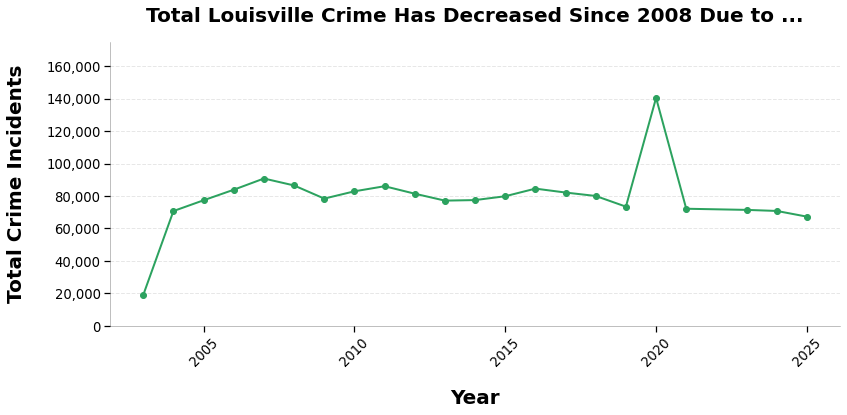

In [430]:
# Some chart stlying is inherited from seaborn styling template earlier in the code e.g. the blueish/grey chart bg.

plt.figure(figsize=(12, 6))
plt.plot(crimes_by_year.index,
         crimes_by_year.values,
         marker = "o",
         linestyle = "-",
         color = "#2ca25f",
         linewidth = 2)

plt.xlabel("Year", fontsize=20, labelpad=20, fontweight='bold')
plt.ylabel("Total Crime Incidents", labelpad=20,fontsize=20, fontweight='bold')
plt.title("Total Louisville Crime Has Decreased Since 2008 Due to ...", fontweight='bold',fontsize=20, pad=20)
plt.xticks(rotation=45)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0,175_000)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# I looked this up
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()